# **Eksplorasi Analisis Musik Spotify: Wawasan Mendalam tentang Genre, Fitur, dan Tren**

## **Data Preparation**

### Collaborator :
- Taufik Suryo Abintoro (202110370311510)
- Febriansyah Ilham Nur Wakit (202110370311511)
- Haidar Zakki Jumali (202110370311514)

### 1.1 Pendahuluan

Proyek ini bertujuan untuk mengeksplorasi dan menganalisis data lagu-lagu Spotify dengan fokus pada genre musik, fitur audio, dan tren yang muncul. Melalui eksplorasi data (EDA), proyek ini bertujuan untuk mengidentifikasi pola-pola musik yang relevan dan memberikan wawasan tentang hubungan antara genre musik dan fitur audio yang mempengaruhi popularitas lagu. Selain itu, proyek ini juga akan menggunakan algoritma K-Nearest Neighbors (KNN) dan K-MEANS untuk memberikan rekomendasi lagu-lagu berdasarkan pola-pola musik yang terdeteksi, meskipun fokus utama dari proyek ini adalah pada analisis eksplorasi data dan pemahaman karakteristik musik, seperti danceability, energy, dan acousticness.

### 1.2 Sumber Data

Dataset berasal dari proyek [TidyTuesday](https://github.com/rfordatascience/tidytuesday) terkhususnya [Dataset](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md) dan dikumpulkan menggunakan paket [`spotifyr`](https://github.com/charlie86/spotifyr). Data dirilis pada **21 Januari 2020** dan dapat diakses melalui tautan berikut: [spotify_songs.csv](https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv).

### 1.3 Spotify Dataset

- Tujuan Data : Data ini dikhususkan untuk analisis spotify.

- Jumlah Variabel : Dataset ini mencakup 19 variabel. Dictionary data ini adalah sebagai berikut.

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |

## **Package Import And Setup**

In [1]:
# Data Structure Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Unsupervised Data Mining Algorithms
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

# Metriks
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

#Display
from IPython.display import display
pd.set_option('display.max_columns', None)

# Warning Remove
import warnings
warnings.filterwarnings('ignore')


* Data Load

In [2]:
df_ori = pd.read_csv('spotify_songs.csv')

In [3]:
df = df_ori.copy()
dfeda = df_ori.copy()

## **Data Assesment**

In [4]:
dfeda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
dfeda.head(5)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616  
3          0.000009    0.2040    0.277  121.956       169093  
4          0.000000    0.0833    0.725  123.976       189052

In [6]:
dfeda.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [7]:
dfeda.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [8]:
dfeda.shape

(32833, 23)

In [9]:
dfeda.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
from IPython.display import display

# Filter rows with missing data
missing_data_rows = dfeda[dfeda.isna().any(axis=1)]
# Condensed view of rows with missing data
condensed_missing = missing_data_rows[['track_id', 'track_name', 'track_artist', 'track_album_name', 'playlist_name']]
# Display the table
display(condensed_missing)


track_id track_name track_artist track_album_name  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN              NaN   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN              NaN   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN              NaN   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN              NaN   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN              NaN   

            playlist_name  
8151              HIP&HOP  
9282          GANGSTA Rap  
9283          GANGSTA Rap  
19568  Reggaeton viejito🔥  
19811       latin hip hop

In [11]:
print("Jumlah Duplikat : ", dfeda.duplicated().sum())

Jumlah Duplikat :  0


In [13]:
dfeda.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

## ======================== Investigation =======================

Dari seluruh data di atas, yang digunakan terdapat informasi yang dapat diambil seperti berikut:

* Jumlah Data: Terdapat 32,833 entri dalam dataset, dengan 23 kolom.

* **TIPE DATA**  
    * 9 kolom bertipe float64 (nilai numerik).
    * 4 kolom bertipe int64 (nilai numerik integer).
    * 10 kolom bertipe object (nilai kategorikal atau string).
    * Terdapat kesalahan tipe data pada kolom `track_album_release_date`.

* **MISSING VALUES**  
  Terdapat 5 baris missing value, dimana:
  - 5 missing value pada kolom `track_name`.
  - 5 missing value pada kolom `track_artist`.
  - 5 missing value pada kolom `track_album_name`.  
  Dari 32k data untuk `track_id`, maka hanya ditemukan 28k unique value, yang mengisyaratkan bahwa memang tidak ada duplikat, namun mereka hanya berada di playlist yang berbeda.

* **DUPLICATE DATA**  
  Tidak terdapat duplikasi data.

### Solusi untuk missing value

Dari informasi di atas terdapat masalah pada kolom `track_name`, `track_album_name`, dan `track_artist`, dimana kedua kolom tersebut terdapat missing value atau NaN value. Terdapat tiga metode untuk mengatasi missing value, yaitu:
- *Dropping* 
- *Imputation*
- *Interpolation*  

Teknik **Dropout** akan dilakukan, karena jumlah data sekitar 38.000, dengan 5 drop tidak akan berpengaruh signifikan terhadap dataset. Selain itu, dengan tidak adanya informasi lanjutan tentang judul lagu, artis, dan albumnya, maka solusi untuk input secara logis tidak memungkinkan.

### Solusi untuk tipe data

- Tipe data pada kolom `track_album_release_date` perlu diubah ke *datetime*.
- Selain itu, terdapat beberapa baris yang hanya berisi {tahun} dan {tahun}-{bulan}, sehingga perlu diubah ke format {tanggal}-{bulan}-{tahun} sebelum tipe datanya diubah.


## **Data Cleaning**

* Drop Missing Value

In [14]:
df = df.dropna()

* Fixing Data Type

In [15]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [16]:
def standardize_date(date):
    if len(date) == 4:
        return f"{date}-01-01"
    elif len(date) == 7:
        return f"{date}-01"
    else:
        return date

df['track_album_release_date'] = df['track_album_release_date'].apply(standardize_date)

df['track_album_release_date'] = pd.to_datetime(
    df['track_album_release_date'],
    errors='coerce'
)

In [16]:
display(df.head())

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616  
3          0.000009    0.2040    0.277  121.956       169093  
4          0.000000    0.0833    0.725  123.976       189052

## **Exploratory Data Analysis (EDA)**

In [18]:
df.describe()

track_popularity  danceability        energy           key  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603      5.373949   
std           24.980476      0.145092      0.180916      3.611572   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32828.000000  32828.000000  32828.000000  32828.000000   
mean      -6.719529      0.565737      0.107053      0.175352   
std        2.988641      0.495667      0.101307      0.219644   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171250      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean           0.084760      0.190175      0.510556    120.883642   
std            0.224245      0.154313      0.233152     26.903632   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.961000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918250   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32828.000000  
mean   225796.829779  
std     59836.492346  
min      4000.000000  
25%    187804.500000  
50%    216000.000000  
75%    253581.250000  
max    517810.000000

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32828 non-null  object        
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32828 non-null  int64         
 4   track_album_id            32828 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  32828 non-null  datetime64[ns]
 7   playlist_name             32828 non-null  object        
 8   playlist_id               32828 non-null  object        
 9   playlist_genre            32828 non-null  object        
 10  playlist_subgenre         32828 non-null  object        
 11  danceability              32828 non-null  float64       
 12  energy            

Storyboard : Eksplorasi Analisis Musik Spotify: Wawasan Mendalam tentang Genre, Fitur, dan Tren

* Jumlah Data: Terdapat 32,828 entri dalam dataset, dengan 23 kolom.

* Statistik Deskriptif:

    * track_popularity: Nilai rata-rata 42.48, dengan rentang dari 0 hingga 100.
    * danceability dan energy: Rata-rata masing-masing 0.65 dan 0.70, dengan distribusi yang skewed.
    * loudness: Rata-rata -6.72 dB, dengan variasi yang cukup besar (rentang dari -46.45 hingga 1.28).
    * speechiness, acousticness, instrumentalness, dan liveness memiliki rata-rata rendah, menunjukkan nilai yang tidak terlalu dominan.
    * valence: Nilai rata-rata 0.51, cenderung seimbang (mendekati nilai tengah).
    * tempo: Rata-rata 120.88 BPM, menunjukkan tempo rata-rata yang cepat.
    * duration_ms: Durasi rata-rata lagu sekitar 226 detik.

* Rentang Data:

    * track_popularity: Rentang dari 0 hingga 100.
    * duration_ms: Durasi lagu berkisar antara 4,000 ms hingga 517,810 ms.

* Distribusi Kolom:

    * key dan mode memiliki rentang yang terbatas, menunjukkan nilai yang terstandarisasi.
    * speechiness, acousticness, instrumentalness, dan liveness menunjukkan rentang nilai yang lebih kecil dan lebih terpusat di sekitar nilai rendah.
    * Memory Usage: Dataset menggunakan sekitar 5.8 MB memori, cukup efisien untuk ukuran data yang besar

* **TIPE DATA**  
    * 9 kolom bertipe float64 (nilai numerik).
    * 4 kolom bertipe int64 (nilai numerik integer).
    * 9 kolom bertipe object (nilai kategorikal atau string).
    * 1 kolom bertipe datetime64[ns] (nilai tanggal dan waktu).

#### Pertanyaan 1 : Bagaimana rata-rata popularitas lagu berdasarkan genre playlist, dan genre mana yang memiliki tingkat popularitas tertinggi?

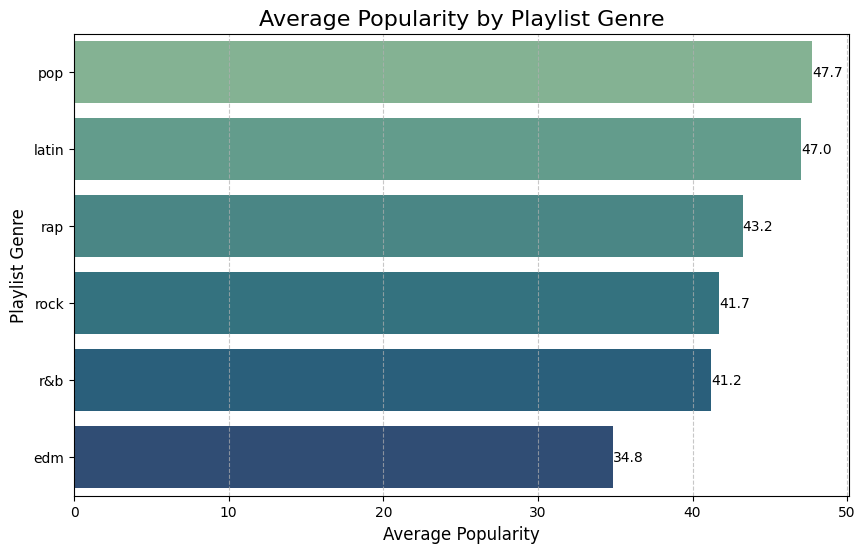

In [102]:
# Average popularity by playlist genre, sorted in descending order
playlist_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Plotting with improvements
plt.figure(figsize=(10, 6))

# Use a green-turquoise gradient palette
palette = sns.color_palette("crest", n_colors=len(playlist_popularity))
sns.barplot(x=playlist_popularity.values, y=playlist_popularity.index, palette=palette)

# Adding data labels
for index, value in enumerate(playlist_popularity.values):
    plt.text(value, index, f'{value:.1f}', va='center', ha='left', color='black')

# Enhancing readability
plt.title('Average Popularity by Playlist Genre', fontsize=16)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Playlist Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding gridlines for comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Genre pop merupakan genre paling populer dengan rata-rata mencapai 47% dibandingkan genre lainnya yang terdapat dalam playlist pengguna. Hal ini menunjukkan bahwa genre pop banyak diminati oleh pengguna umum karena sifatnya yang mudah didengar (*easy listening*). Posisi berikutnya ditempati oleh genre Latin, rap, rock, R&B, dan EDM.

#### Pertanyaan 2 : Berapa banyak lagu yang tersedia dalam setiap genre playlist, dan genre mana yang memiliki jumlah lagu terbanyak?

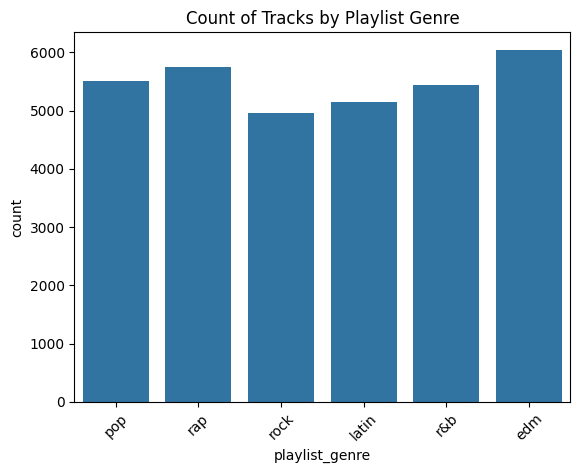

In [103]:
# Count of tracks by playlist genre
sns.countplot(data=df, x='playlist_genre')
plt.title('Count of Tracks by Playlist Genre')
plt.xticks(rotation=45)
plt.show()

Namun, pada playlist dengan genre spesifik, jumlah lagu yang tersedia cukup banyak, mencapai total hingga 6.000 lagu. Genre ini diikuti oleh rap, pop, R&B, Latin, dan rock dalam urutan jumlah lagu yang tersedia.

#### Pertanyaan 3 : Bagaimana distribusi jumlah lagu berdasarkan tahun rilis, dan kapan puncak jumlah lagu dirilis?

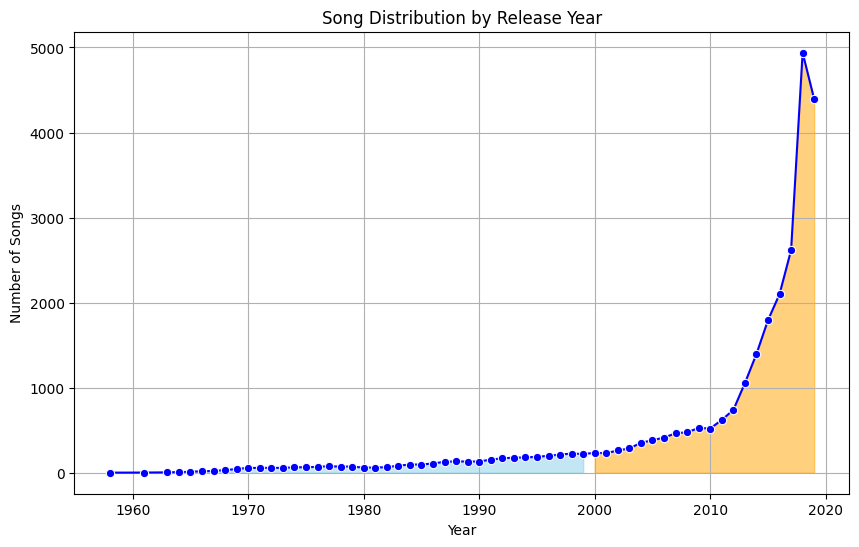

In [104]:
# Assuming your DataFrame is named df and has a 'track_album_release_date' column
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

# Counting the number of songs released each year
yearly_tracks = df['year'].value_counts().sort_index()

# Now, proceed with the rest of your code:
# Removing the most recent year if it's incomplete
yearly_tracks = yearly_tracks[yearly_tracks.index < 2023]  # Adjust the year based on your dataset

# Smoothing the trend with a rolling average
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Song Distribution by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)

# Adding annotations for key points
max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

# Color coding different eras
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2000, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2000, color='orange', alpha=0.5)

plt.show()

Distribusi perilisan lagu menunjukkan peningkatan signifikan sejak tahun 2010 dan mencapai puncaknya pada awal tahun 2019. Namun, terjadi penurunan pada tahun 2020. Hal ini dapat diasumsikan sebagai dampak dari semakin populernya Spotify sebagai layanan streaming, sehingga lagu-lagu yang dirilis di platform tersebut lebih banyak terbatas pada rentang tahun 2000–2020. Meski demikian, kemungkinan besar katalog lagu di platform ini akan terus diperbarui seiring waktu.

#### Pertanyaan 4 : Bagaimana distribusi popularitas lagu dalam setiap genre playlist, dan apakah terdapat genre dengan variasi popularitas yang lebih besar atau lebih kecil dibandingkan genre lainnya?

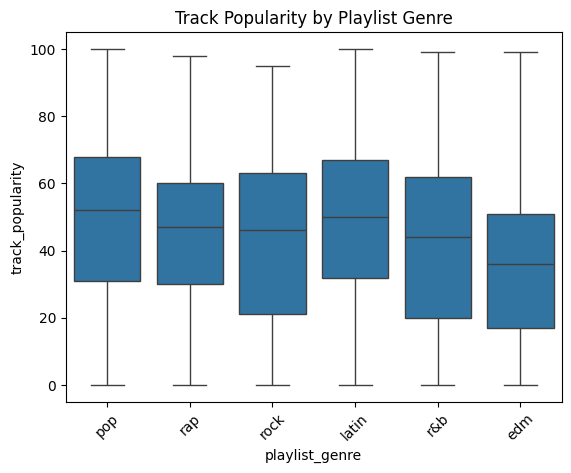

In [105]:
# Boxplot of track popularity by playlist genre
sns.boxplot(data=df, x='playlist_genre', y='track_popularity')
plt.title('Track Popularity by Playlist Genre')
plt.xticks(rotation=45)
plt.show()

Tidak adanya *whisker* pada boxplot menunjukkan bahwa distribusi popularitas lagu terhadap genre playlist memiliki karakteristik tertentu. Berikut adalah analisis yang lebih terperinci untuk beberapa genre:  

- **Rock dan R&B**  
  - Memiliki rentang popularitas yang lebar, berkisar antara 20 hingga 62.  
  - Hal ini menunjukkan adanya lagu yang sangat populer dan lagu yang sangat tidak populer dalam kedua genre ini.  

- **EDM**  
  - Distribusinya berada di posisi yang lebih rendah dibandingkan dengan rock dan R&B.  
  - Masih terdapat variasi popularitas, meskipun lebih terbatas.  

- **Rap**  
  - Memiliki rata-rata popularitas yang stabil di kisaran 30 hingga 60.  
  - Hal ini mengindikasikan bahwa meskipun genre ini tidak terlalu *mainstream*, penggemarnya cukup konsisten.  

- **Latin dan Pop**  
  - Memiliki rentang popularitas yang kecil dengan posisi yang tinggi.  
  - Hal ini menunjukkan bahwa sebagian besar lagu dalam kedua genre ini secara konsisten memiliki tingkat popularitas yang tinggi.  

Distribusi ini mencerminkan dinamika popularitas yang unik di setiap genre, dengan variasi yang mencerminkan perbedaan minat dan selera audiens.

#### Pertanyaan 5 : Bagaimana distribusi karakteristik danceability dan energy pada lagu-lagu, dan bagaimana nilai rata-rata dari kedua karakteristik ini dibandingkan?

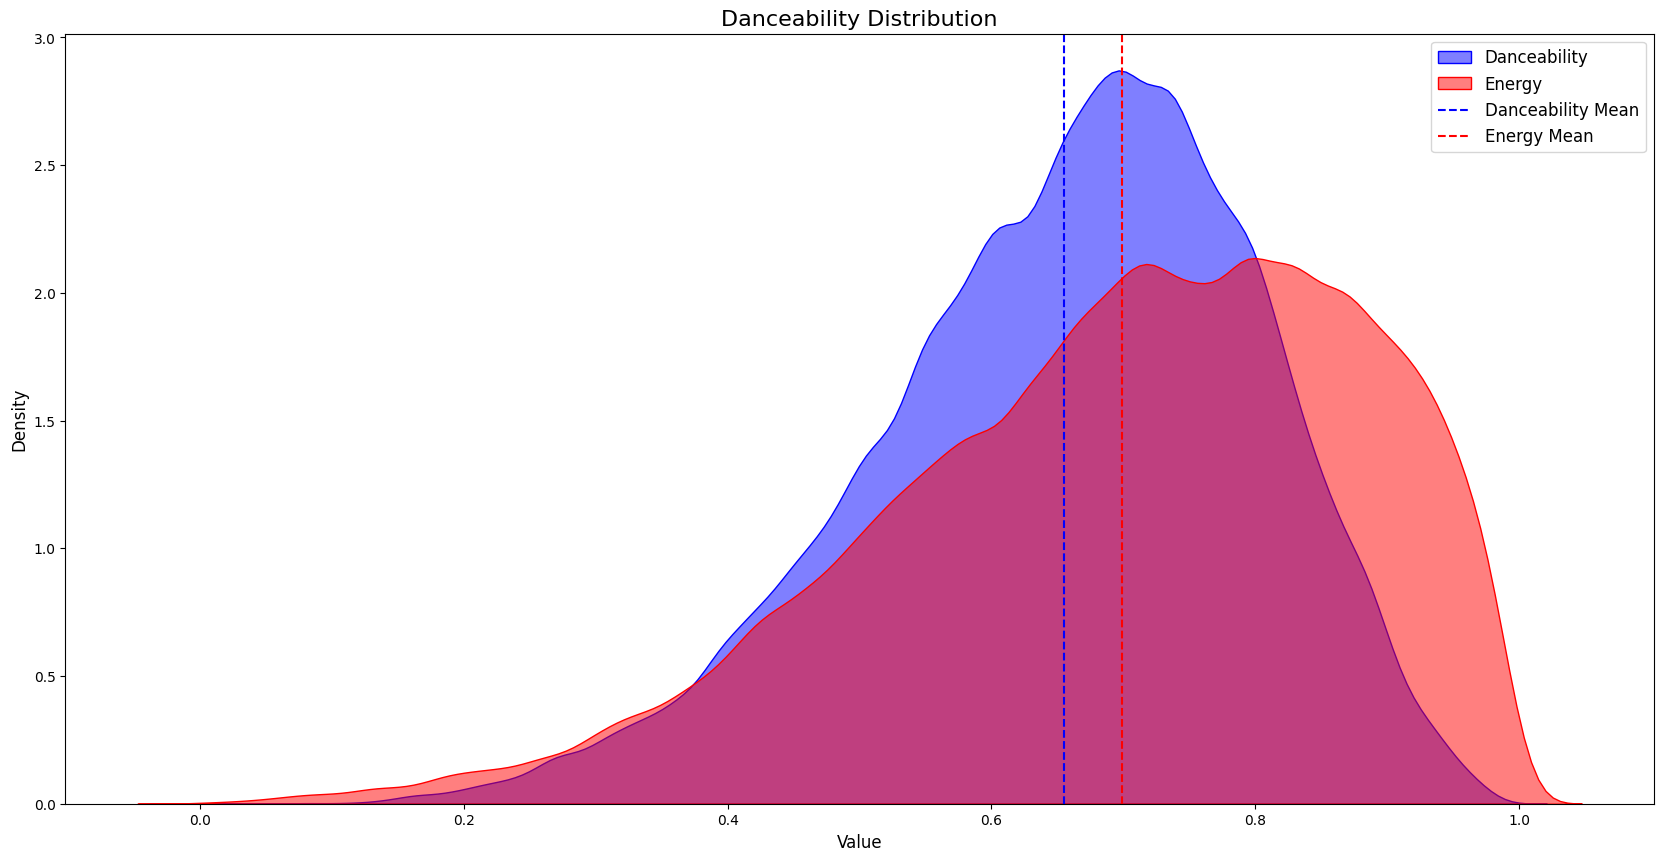

In [106]:
# plot Danceability Distribution
plt.figure(figsize=(20.5, 10))
sns.kdeplot(df['danceability'], shade=True, label='Danceability', color='blue', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(df['energy'], shade=True, label='Energy', color='red', alpha=0.5, bw_adjust=0.7)
plt.axvline(df['danceability'].mean(), color='blue', linestyle='--', label='Danceability Mean')
plt.axvline(df['energy'].mean(), color='red', linestyle='--', label='Energy Mean')
plt.title('Danceability Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

Analisis Danceability dan Energy
* Nilai Skewed dan Pola Sama
Distribusi danceability dan energy menunjukkan pola yang serupa, meskipun keduanya skewed.

* Danceability memiliki puncak distribusi yang lebih tinggi dengan nilai >0.7, menunjukkan bahwa lebih banyak lagu yang bersifat danceable dan energik.
Distribusi energy memiliki puncak yang lebih rendah dibandingkan danceability, dengan pundak yang tidak setinggi danceability.
Perbandingan Mean

* Rata-rata energy sedikit lebih besar dibandingkan danceability, meskipun perbedaannya sangat tipis.
Hal ini mengindikasikan bahwa lagu-lagu cenderung lebih energik daripada danceable.
Area Overlapping dan Korelasi

* Area overlapping antara danceability dan energy cukup luas.
Terdapat korelasi positif antara kedua fitur ini, yaitu lagu dengan danceability tinggi cenderung juga memiliki nilai energy tinggi, tetapi hubungan ini berhenti pada ambang (threshold) tertentu.

#### Pertanyaan 6 : Bagaimana distribusi variabel numerik pada lagu-lagu dalam dataset, dan siapa saja artis yang paling sering muncul serta genre playlist yang paling dominan?

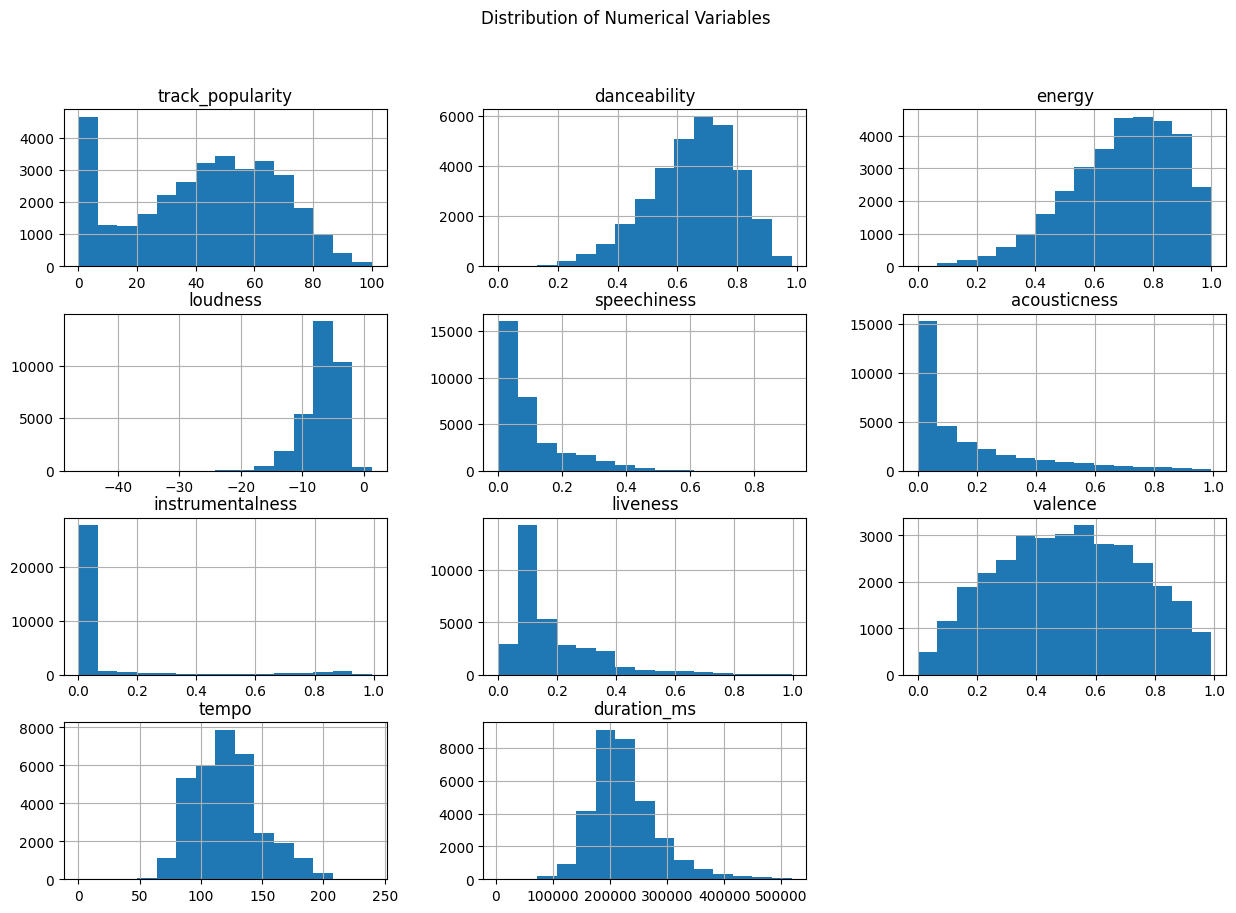


playlist_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: count, dtype: int64

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64


In [107]:
numerical_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

# Frequency of categorical variables
print()
print(df['playlist_genre'].value_counts())

# Top 10 most frequent artists
print()
print(df['track_artist'].value_counts().head(10)) 

Melalui grafik
1. track_poplarity, skew puncak pada area negatif menandakan tidak banyak lagu populer di playlist pengguna, namun area persebaran selanjutnya seimbang rendah hingga sedang
2. danceability, banyak track yang danceable skew positif
3. energy, banyak lagu energik juga dengan mean disekitar 7.0 skew positif
4. loudness, berpengaruh pada persebaran hingga minus diasumsikan tidak banyak yang menyukai genre rock
5. Speechiness: Skew negatif, sebagian besar track memiliki sedikit elemen vokal atau rap.
6. Acousticness: Skew negatif, sebagian besar track lebih banyak mengandung elemen elektronik daripada akustik.
7. Instrumentalness: Skew negatif, sebagian besar track memiliki vokal, hanya sedikit yang sepenuhnya instrumental.
8. Liveness: Skew positif, banyak track memiliki elemen "live" atau rekaman langsung.
9. Valence: Banyak lagu dengan skor rendah, distribusi simetris.
10. Tempo: Banyak lagu dengan tempo rendah, distribusi skew di tengah.
11. Duration: Banyak lagu dengan durasi singkat, distribusi skew di tengah.

Dataset ini menunjukkan bahwa genre seperti EDM, pop, dan rap mendominasi dengan track yang lebih energik dan mudah danceable.
Track dengan tempo lebih rendah dan durasi lebih singkat lebih umum, dengan sebagian besar lagu tidak terlalu akustik atau instrumental.
Artis-artis besar seperti Martin Garrix dan Queen menunjukkan pengaruh yang signifikan dalam dataset ini, mencerminkan preferensi audiens terhadap nama-nama besar dan genre dominan.

#### Pertanyaan 7 : Bagaimana popularitas lagu terdistribusi dalam berbagai genre dan subgenre playlist, dan apakah ada genre atau subgenre tertentu yang memiliki popularitas yang lebih tinggi dibandingkan lainnya?

In [108]:
df[['playlist_genre', 'playlist_subgenre']] = df[['playlist_genre', 'playlist_subgenre']] \
                                                  .apply(lambda x: x.str.capitalize(), axis=1)
fig = px.sunburst(df,
                  path=['playlist_genre', 'playlist_subgenre'], 
                  color='track_popularity', 
                  labels={'track_popularity': 'Popularity'})
fig.show()

* Pop

    * Genre pop paling populer adalah post-teen pop, yang mungkin lebih digemari oleh kalangan remaja. Hal ini sejalan dengan hasil analisis sebelumnya mengenai danceability dan energy, yang menjelaskan bahwa genre ini memiliki daya tarik bagi pendengar yang mencari lagu yang mudah didengar dan enerjik.

* Rap & Hip-Hop

    * Rap yang paling populer adalah hip-hop, yang merupakan bentuk rap paling dasar dan sudah menjadi bagian dari budaya mainstream, sehingga mudah diterima oleh khalayak umum pengguna Spotify.
Gangster rap kurang diminati, mungkin karena tema liriknya yang keras dan tidak dijelaskan secara eksplisit melalui fitur yang ada.

* R&B

    * Dalam genre R&B, hip-hop merupakan subgenre yang paling populer. Namun, New Jack Swing kurang diminati, yang menunjukkan bahwa preferensi pendengar lebih condong kepada gaya yang lebih modern dan energik.

* Latin

    * Genre latin yang paling populer adalah reggaeton, yang memiliki korelasi kuat dengan fitur danceability dan energy yang lebih tinggi, menjelaskan daya tarik genre ini bagi pendengar yang menyukai lagu dengan tempo cepat dan penuh energi. Semua subgenre dalam latin cukup populer, dengan distribusi yang merata di rentang sekitar 40K kata.

* Rock

    * Dalam genre rock, permanent wave adalah subgenre yang paling populer, sementara hard rock kurang diminati, yang mungkin disebabkan oleh tingginya tingkat loudness yang kurang disukai oleh sebagian pendengar.
* EDM

    * Pada genre EDM, pop EDM mendominasi sebagai subgenre paling populer, sedangkan progressive electro house cenderung kurang populer, mungkin karena karakteristiknya yang lebih spesifik dan tidak sebanyak pop EDM yang lebih mudah diterima.


#### Pertanyaan 8 : Lagu mana yang memiliki popularitas tertinggi berdasarkan artis, dan bagaimana popularitas rata-rata lagu-lagu dari artis-artis tersebut?

In [109]:
fig = px.treemap(df.groupby(['track_artist', 'track_name']).track_popularity.mean().sort_values(ascending=False).reset_index()[:100],
                 path=['track_artist', 'track_name'], 
                 values='track_popularity',
                 title="Artists"
                )
fig.show()

Billie Eilish, Travis Scott, dan DaBaby memegang popularitas tertinggi di Spotify, masing-masing dengan 1 hingga 3 lagu populer. Mereka mewakili genre pop, rap, Latin, EDM, dan rock, menunjukkan keberagaman musik yang digemari pendengar di platform ini.

#### Pertanyaan 9 : Bagaimana distribusi jumlah lagu dan rata-rata popularitas dalam setiap genre dan subgenre playlist?

In [110]:
fig = px.treemap(df.groupby(['playlist_genre', 'playlist_subgenre']).track_popularity.agg(['count', 'mean']).reset_index(),
                 path=[px.Constant('Playlist Genres'), 'playlist_genre', 'playlist_subgenre'], 
                 values='count', 
                 color='mean',
                 labels={'mean': 'Popularity'},
                )
fig.show()

Distribusi jumlah lagu dan popularitas dalam setiap genre dan subgenre playlist masih didominasi oleh pop, latin, rap, R&B, EDM, dan rock, yang terlihat jelas dari intensitas warna pada grafik.

#### Pertanyaan 10 : Bagaimana hubungan antara popularitas lagu dan fitur-fitur lainnya seperti danceability, energy, loudness, dan lainnya?

In [111]:
plot_df = df.copy()
plot_df.columns = plot_df.columns.str.replace("_", " ").str.title()

fig = px.parallel_coordinates(
    pd.concat([plot_df.select_dtypes(float), plot_df['Track Popularity']], axis=1), 
    color="Track Popularity", 
    color_continuous_scale=px.colors.diverging.Spectral, 
    color_continuous_midpoint=5,
    labels={'Track Popularity': 'Popularity'},
)
fig.update_layout(
    title={
        'text': "Popularity against features",
        'x': 0.5,
        'y': 0.99,
        'xanchor': 'center'
    },
    margin=dict(t=80)
)
fig.show()

1. Lagu yang memiliki potensi untuk populer adalah lagu-lagu yang memiliki suasana yang mengundang pendengar untuk menari.
2. Valensi lagu memiliki pengaruh besar terhadap popularitas. Lagu dengan valensi tinggi, seperti lagu yang ceria, positif, dan bahagia, cenderung lebih populer dibandingkan dengan lagu dengan valensi rendah.
3. Lagu dengan tempo yang lebih tinggi tidak terlalu populer, sedangkan lagu dengan tempo moderat hingga rendah justru lebih banyak didengarkan, yang berarti lebih populer.
4. Lagu dengan durasi antara 2 hingga 5 menit adalah yang paling optimal dalam hal popularitas.

#### Pertanyaan 11 : Bagaimana interaksi antara berbagai fitur (misalnya danceability, energy, loudness, dll.), dan kombinasi fitur mana yang paling berkorelasi dengan popularitas tinggi?

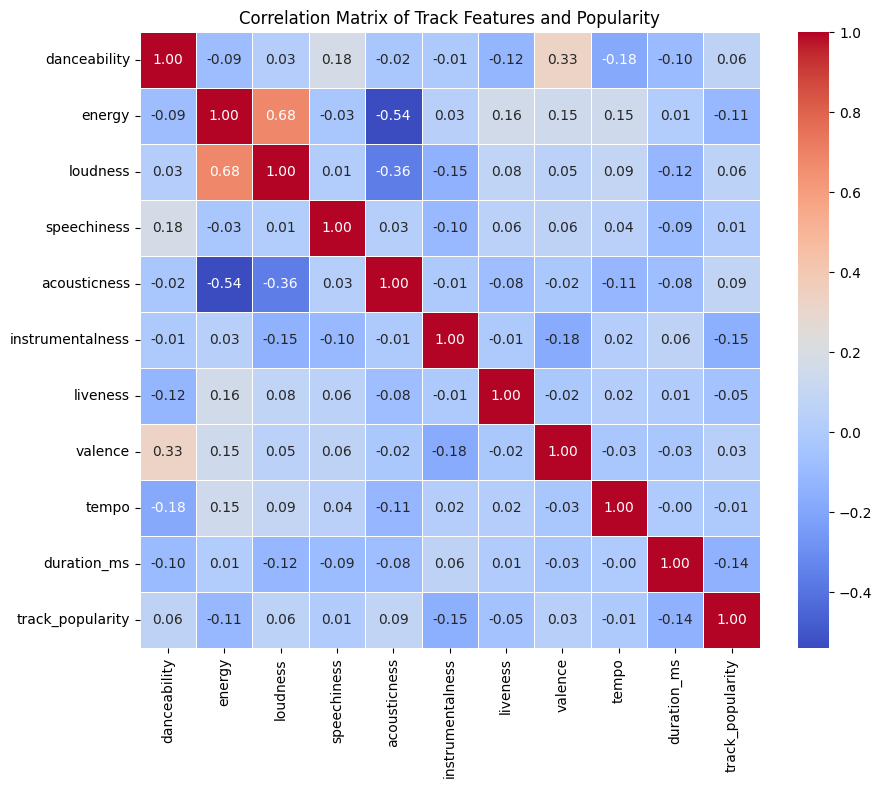

In [17]:
# Select relevant columns for the analysis
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_popularity']

# Compute the correlation matrix
corr_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Track Features and Popularity')
plt.show()


Hubungan antara antar fitu dengan presentasi yang lebih mudah dan straight to the point

#### Pertanyaan 12 : Bagaimana tren popularitas lagu dari waktu ke waktu dalam genre atau subgenre tertentu, dan bagaimana genre tertentu berkembang dalam hal popularitas sepanjang periode waktu yang berbeda?

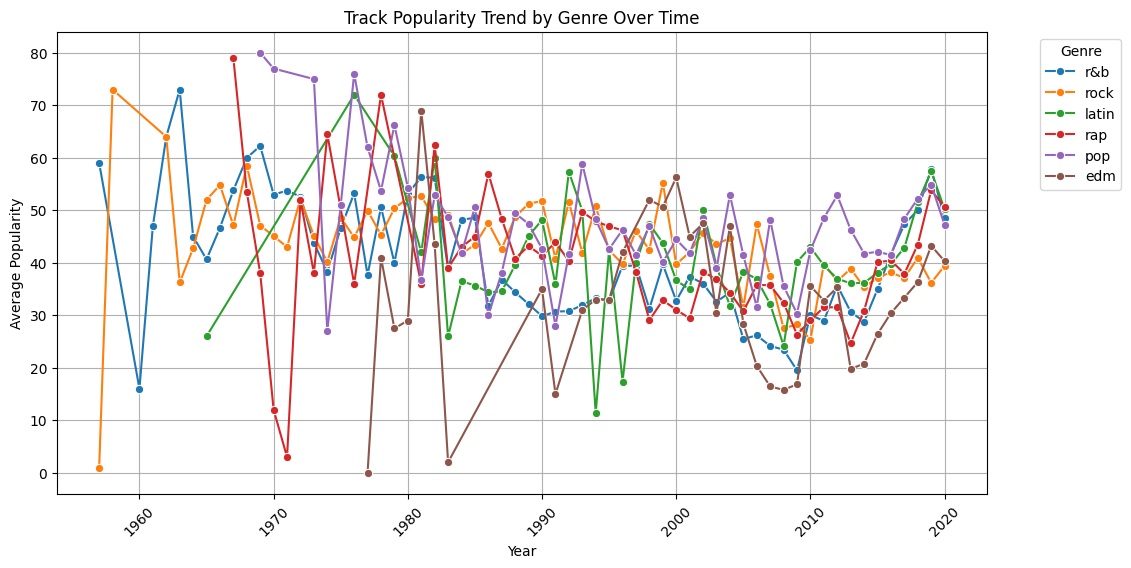

In [18]:
# Ensure the 'year' column is available as shown in your previous code
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

# Group by year and genre/subgenre for popularity trends
genre_trends = df.groupby(['year', 'playlist_genre'])['track_popularity'].mean().reset_index()

# Plotting the trend for each genre
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trends, x='year', y='track_popularity', hue='playlist_genre', marker='o')
plt.title('Track Popularity Trend by Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Grafik menunjukkan fluktuasi signifikan dalam popularitas lagu per genre dari tahun ke tahun, mencerminkan perubahan selera pendengar Spotify yang dinamis. Beberapa genre mengalami peningkatan konsisten, sementara yang lain mengalami penurunan, mencerminkan pergeseran preferensi audiens. Fluktuasi lebih besar terlihat pada genre seperti EDM dan pop, sementara genre lain seperti rock dan R&B lebih stabil. Tren ini menunjukkan respons audiens terhadap artis baru dan fenomena musik global.

##  **Advance Analysis : Unsupervised Learning** 

### **(1) : K-MEANS Recommendation Systems**

* Membuat Dataframe Baru Untuk Fitur Yang Relevan

In [112]:
#Create new dataframe by keeping useful features from the previous one
new_df = df.drop(['track_id', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre'], axis=1)

* Melakukan splitting terhadap dataset serta, menentukan target vs fitu

In [113]:
# Selecting columns for features and target variable
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms']
target = 'playlist_subgenre'

# Creating feature set and target variable
X = new_df[features]
y = new_df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Transformasi Menjadi Bentuk Numerik

In [114]:
# Import library and encode target
le = LabelEncoder()
y = le.fit_transform(y)

* Melakukan Normalisasi Menggunakan MinMax Scaller

In [115]:
# Feature scaling
cols = X.columns
mms = MinMaxScaler()
X = mms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

* Menggunakan elbow method untuk menentukan berapa banyak kluster yang harus digunakan

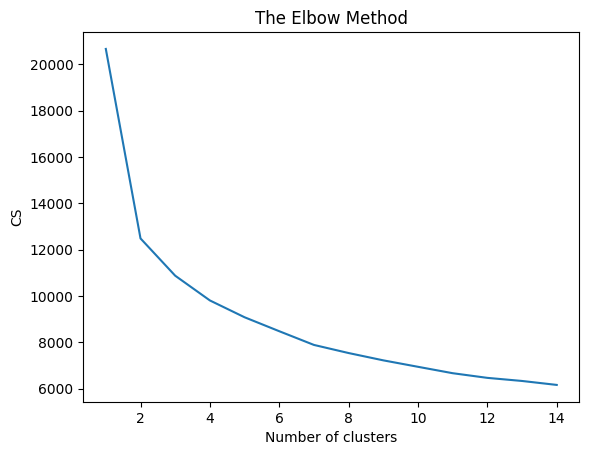

In [116]:
# Use Elbow method to find the optimal number of clusters
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

* Membuat Model KMeans

In [117]:
# K Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

* Melakukan Pengecekan Model

In [118]:
# Check model accuracy with k=2
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1371 out of 32828 samples were correctly labeled.
Accuracy score: 0.04


* Menggunakan Kluster 2 Untuk KMeans

In [119]:
#The most decrease is around 2 clusters, but the previous shown that 2 clusters only lead to 16% accuracy
#Try other clusters

cluster_num = []
accuracy = []

for i in range (1, 15):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    correct_labels = sum(y == labels)
    cluster_num.append(i)
    accuracy.append(correct_labels/float(y.size))
    
performance = pd.DataFrame({'cluster_num': cluster_num, 'accuracy': accuracy})

In [120]:
# Apply result
kmeans = KMeans(n_clusters=13, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=13, n_init=10, random_state=42)

In [121]:
# Add cluster labels to DataFrame
new_df['cluster'] = kmeans.labels_

# Print the DataFrame with cluster labels
new_df.head()

track_name      track_artist  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                    Memories - Dillon Francis Remix          Maroon 5   
2                    All the Time - Don Diablo Remix      Zara Larsson   
3                  Call You Mine - Keanu Silva Remix  The Chainsmokers   
4            Someone You Loved - Future Humans Remix     Lewis Capaldi   

   track_popularity playlist_subgenre  danceability  energy  key  loudness  \
0                66         Dance pop         0.748   0.916    6    -2.634   
1                67         Dance pop         0.726   0.815   11    -4.969   
2                70         Dance pop         0.675   0.931    1    -3.432   
3                60         Dance pop         0.718   0.930    7    -3.778   
4                69         Dance pop         0.650   0.833    1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms    year  cluster  
0  122.036       194754  2019.0       10  
1   99.972       162600  2019.0       10  
2  124.008       176616  2019.0        3  
3  121.956       169093  2019.0       11  
4  123.976       189052  2019.0        9

In [122]:
new_df[new_df['track_artist'] == 'Ariana Grande'].head()

track_name   track_artist  \
370                             One Last Time  Ariana Grande   
1207                                  Problem  Ariana Grande   
1335  Bad To You (with Normani & Nicki Minaj)  Ariana Grande   
1723                            thank u, next  Ariana Grande   
1733                     no tears left to cry  Ariana Grande   

      track_popularity playlist_subgenre  danceability  energy  key  loudness  \
370                 16         Dance pop         0.628   0.593    8    -5.036   
1207                 9         Dance pop         0.660   0.805    1    -5.352   
1335                76     Post-teen pop         0.727   0.583    7    -7.385   
1723                87     Post-teen pop         0.717   0.653    1    -5.634   
1733                83     Post-teen pop         0.699   0.713    9    -5.507   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
370      1       0.0323        0.0930          0.000002     0.096    0.104   
1207     0       0.1530        0.0192          0.000009     0.159    0.625   
1335     0       0.0718        0.0650          0.000000     0.106    0.629   
1723     1       0.0658        0.2290          0.000000     0.101    0.412   
1733     0       0.0594        0.0400          0.000003     0.294    0.354   

        tempo  duration_ms    year  cluster  
370   125.026       197267  2014.0       11  
1207  103.009       193920  2014.0        3  
1335  147.983       171840  2019.0        6  
1723  106.966       207320  2019.0        0  
1733  121.993       205920  2018.0        8

Hasil Dari Recomendation System Menggunakan KMEANS

In [123]:
# Track name to find similar songs
track_name = 'Shape of You'

# Filter rows with the same cluster as the given track
similar_songs = new_df[(new_df['track_name'] != track_name) & 
                       (new_df['cluster'] == new_df.loc[new_df['track_name'] == track_name, 'cluster'].iloc[0])]

# Show similar songs
similar_songs[['track_name', 'track_artist']].head(10)

track_name      track_artist
2                  All the Time - Don Diablo Remix      Zara Larsson
13  SOS - Laidback Luke Tribute Remix / Radio Edit            Avicii
37             Side Effects - Fedde Le Grand Remix  The Chainsmokers
42                                      Unlove You  Armin van Buuren
48                     American Boy - Brooks Remix           Estelle
59               All Star - Breathe Carolina Remix       Smash Mouth
65                           Talk - Disclosure VIP            Khalid
69      Hearts Ain't Gonna Lie - Eden Prince Remix           Arlissa
80                                    All the Time      Zara Larsson
94                                          Harder         Jax Jones

###  **(2) : KNN Recommendation Systems**

* Melakukan Splitting Dataset

In [124]:
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

print("Viewing training x_train", train_data.shape)
print("Viewing test test_data", test_data.shape)

Viewing training x_train (24621, 24)
Viewing test test_data (8207, 24)


In [125]:
interaction_matrix = train_data.pivot_table(index='playlist_id', columns='track_id', values='track_popularity').fillna(0)

* Menggunakan K Values untuk menentukan distance

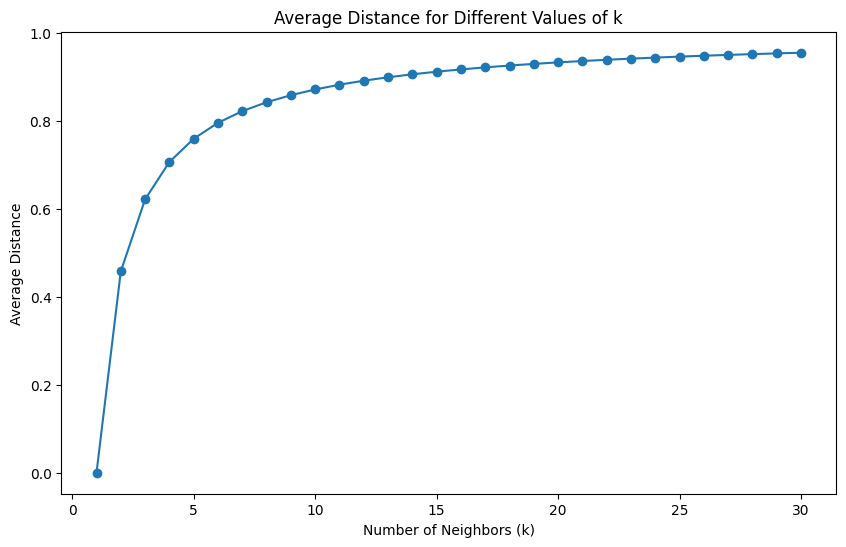

Best value of k: 1


In [126]:
k_values = list(range(1, 31))
mean_distances = []
for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    model.fit(interaction_matrix)
    distances, indices = model.kneighbors(interaction_matrix)
    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_distances, marker='o')
plt.title('Average Distance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(False)
plt.show()

best_k = k_values[np.argmin(mean_distances)]
print(f"Best value of k: {best_k}")

Membuat Model Dengan Best K-Values

In [127]:
model = NearestNeighbors(n_neighbors=best_k, metric='cosine')
model.fit(interaction_matrix)

NearestNeighbors(metric='cosine', n_neighbors=1)

In [128]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = df[features]

* Melakukan Stadarisasi Dengan Standard Scaler

In [129]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler

StandardScaler()

* Menggunakan elbow method untuk menentukan jumlah cluster 

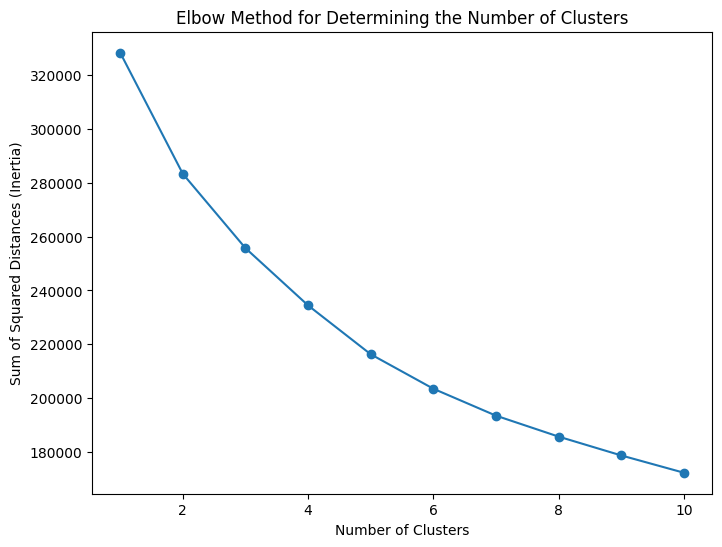

In [130]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.grid(False)
plt.show()

In [131]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=4, random_state=42)

In [132]:
def recommend_songs_by_cluster_kmeans(song_name, data):
    selected_song = data[data['track_name'].str.contains(song_name, case=False, na=False)]
    if selected_song.empty:
        print("Song not found.")
        return None
    cluster = selected_song['cluster_kmeans'].values[0]
    recommended_songs = data[data['cluster_kmeans'] == cluster]
    recommended_songs = recommended_songs[recommended_songs['track_name'] != selected_song['track_name'].values[0]]
    return recommended_songs[['track_name', 'track_artist']].head(30)

* Recomendation System Using KNN KMeans

In [139]:
song_name = "The Dance of Eternity"  
top_recommendations_kmeans = recommend_songs_by_cluster_kmeans(song_name, df)
if top_recommendations_kmeans is not None:
    print("Recommended music")
    print(top_recommendations_kmeans)

Recommended music
                                     track_name               track_artist
45    Heaven Can Wait - The Aston Shuffle Remix                        Sia
169                      With You - LöKii Remix                    Kaskade
202            Dreams Of You (feat. Rae Morris)                     Icarus
342                                       Penny   Dimitri Vangelis & Wyman
350             Shades Of Voices (Original Mix)                     PULLER
353                           Spirit Of Freedom                    Dropgun
361                                     Skyline                     Catiso
362                      Callin' - Extended Mix               Lush & Simon
368                                     Mercury                     Catiso
376                                   Pure Gold                     oomiee
502                                    Sunshine               David Guetta
513                                    Whispers                      ELYAZ
529    

## **CONCLUSIONS**

### Problem Statement

Penelitian ini bertujuan untuk menganalisis popularitas lagu di Spotify berdasarkan genre dan subgenre, serta untuk mengeksplorasi tren musik dari berbagai perspektif. Masalah utama yang dibahas adalah bagaimana faktor-faktor seperti tempo, danceability, energy, dan genre memengaruhi popularitas lagu, serta bagaimana tren popularitas lagu berkembang dari tahun ke tahun.

### Methodologies

Methodologi yang digunakan untuk penelitian ini adalah
KDD Deep Analysis
1. Import Requirements
2. Data Preparation
3. Data Assessing 
4. Data Cleaning
5. Exploratory Data Analysis (EDA)
6. Analysis Result
7. Recomendation Systems : KNN and K-Means 
8. Knowledge, Insight, Implication and Benefit

### Insight & Implikasi Terhadap Konsumen

Dari hasil analisis eksploratori data (EDA) dan analisis lanjutan serta Unsupervised Learning, ditemukan beberapa wawasan menarik, antara lain:

* Genre seperti pop, rap, dan EDM mendominasi platform Spotify, dengan lagu-lagu dalam genre tersebut cenderung lebih energik dan danceable.
Lagu dengan tempo lebih rendah dan durasi lebih singkat memiliki popularitas yang lebih tinggi.
Fluktuasi popularitas antar genre menunjukkan adanya perubahan selera pengguna yang dinamis, dengan beberapa genre mengalami peningkatan signifikan, sementara yang lainnya cenderung stabil atau menurun.

* Analisis ini memberikan wawasan yang berguna bagi para pembuat musik, artis, dan pengelola platform streaming musik untuk memahami preferensi audiens. Dengan mengetahui genre dan fitur lagu yang paling populer, mereka dapat menyesuaikan produksi dan promosi lagu untuk menarik lebih banyak pendengar. Selain itu, wawasan mengenai tren tahunan membantu memahami perubahan selera musik yang dapat digunakan untuk merencanakan rilis lagu atau album di masa depan.

* KNN dan KMEANS dapat membantu untuk membentuk sebuah recomendation system untuk data yang telah diolah berdasarkan properti yang sama, seperti karateristik fitur yang telah dipresentasikan dalam analisis diatas, dan cukup akurat apabila dilihat dari observasi yang telah digenerasi oleh model tersebut.

### Analysis Limitation & Further Development
1. Cakupan Data: Analisis hanya mencakup data Spotify, yang membatasi gambaran tren musik secara global. Penelitian selanjutnya dapat memperluas cakupan data dengan mencakup platform streaming lain.
2. Generalisasi: Fokus pada tren lagu populer mengabaikan genre atau subgenre yang kurang populer. Eksplorasi lebih lanjut terhadap genre niche dapat memberikan wawasan yang lebih beragam.
3. Faktor Eksternal: Penelitian ini tidak mempertimbangkan pengaruh faktor eksternal seperti kolaborasi artis dan tren media sosial. Faktor-faktor ini sebaiknya dimasukkan untuk analisis yang lebih komprehensif.
4. Model Prediktif: Pengembangan model prediktif atau klasifikasi yang lebih canggih dapat meningkatkan akurasi dalam memprediksi popularitas lagu dan tren musik.
5. Subgenre dan Properti Lainnya: Penelitian lebih lanjut dapat menggali analisis mendalam terhadap subgenre musik dan elemen produksi lainnya untuk pemahaman lebih mendalam tentang preferensi audiens.

